In [1]:
##IMPORTING LIBRARIES
import pandas as pd
import statistics as stats
import seaborn as sns #visualisation
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import scipy as scipy

In [2]:
#read in excel files
df_ire = pd.read_excel('/Users/Noel/Documents/MSc_CA2/ireland-cattle-prices.xlsx')
df_GB = pd.read_excel('/Users/Noel/Documents/MSc_CA2/gt.-britain-cattle-prices.xlsx')
df_NI = pd.read_excel('/Users/Noel/Documents/MSc_CA2/n.ireland-cattle-prices.xlsx')

In [3]:
#check for null values
print(df_ire.isnull().sum())
print(df_GB.isnull().sum())
print(df_NI.isnull().sum())

Date                      0
Bulls R3 (Ire)            0
Cows O2 (Ire)             0
Cows O3 (Ire)             0
Cows O4 (Ire)             0
Cows P2 (Ire)             0
Cows P3 (Ire)             0
Cows R2 (lre)           248
Cows R3 (Ire)             0
Cows R4 (Ire)             0
Heifers O2 (Ire)          1
Heifers O3 (Ire)          1
Heifers O4 (Ire)          0
Heifers R2 (Ire)          1
Heifers R3 (Ire)          1
Heifers R4 (Ire)          1
Heifers U2 (Ire)          1
Heifers U3 (Ire)          1
Steers O3 (Ire)           2
Steers O4 (Ire)           0
Steers R3 (Ire)           0
Steers R4 (Ire)           0
Steers U2 (Ire)           0
Steers U3 (Ire)           0
Steers U4 (Ire)           0
Young Bulls O2 (Ire)      0
Young Bulls O3 (Ire)      0
Young Bulls R2 (Ire)      0
Young Bulls R3 (Ire)      0
Young Bulls U2 (Ire)      1
Young Bulls U3 (Ire)      0
dtype: int64
Date                     0
Bulls R3 (GB)          250
Cows O2 (GB)             0
Cows O3 (GB)             0
Cows O4 (GB

In [4]:
df_ire.head()

,Date,Bulls R3 (Ire),Cows O2 (Ire),Cows O3 (Ire),Cows O4 (Ire),Cows P2 (Ire),Cows P3 (Ire),Cows R2 (lre),Cows R3 (Ire),Cows R4 (Ire),...,Steers R4 (Ire),Steers U2 (Ire),Steers U3 (Ire),Steers U4 (Ire),Young Bulls O2 (Ire),Young Bulls O3 (Ire),Young Bulls R2 (Ire),Young Bulls R3 (Ire),Young Bulls U2 (Ire),Young Bulls U3 (Ire)
0,2019-10-28,241.6,255.0,259.2,259.7,228.6,247.7,NaN,279.6,279.3,...,341.3,347.9,352.5,347.3,299.0,303.8,321.6,320.5,330.2,329.8
1,2019-10-14,239.9,264.6,268.3,268.5,235.1,256.0,NaN,288.9,288.0,...,342.1,350.7,353.7,349.1,300.9,305.3,323.7,322.3,332.8,332.3
2,2019-10-07,248.3,270.1,274.2,274.6,242.9,262.0,NaN,296.1,293.7,...,343.9,349.8,353.3,350.4,301.1,306.4,325.7,323.4,337.0,334.6
3,2019-09-30,253.0,277.9,279.9,278.4,252.7,267.1,NaN,298.4,297.1,...,344.3,351.7,356.2,354.0,305.6,309.9,327.5,327.7,336.7,337.1
4,2019-09-16,264.2,283.3,283.9,282.5,257.2,272.6,NaN,302.0,300.1,...,338.1,344.8,347.7,344.1,301.5,309.4,322.0,321.5,328.8,327.8


In [5]:
#combine 3 datasets into one 
concatenated = pd.concat([df_ire, df_GB], axis=1)
df = pd.concat([concatenated, df_NI], axis=1)

In [6]:
#dropping columns that are mostly empty
to_drop = ['Cows R2 (lre)','Bulls R3 (GB)','Cows R2 (GB)','Bulls R3 (NI)', 'Cows R2 (NI)' ]
df.drop(to_drop, inplace=True, axis=1)

In [7]:
#count of rows
df.count()

Date                   250
Bulls R3 (Ire)         250
Cows O2 (Ire)          250
Cows O3 (Ire)          250
Cows O4 (Ire)          250
                      ... 
Young Bulls O3 (NI)    249
Young Bulls R2 (NI)    249
Young Bulls R3 (NI)    249
Young Bulls U2 (NI)    247
Young Bulls U3 (NI)    249
Length: 88, dtype: int64

In [8]:
df.shape

(250, 88)

In [9]:
#dropping entire row that has a null value because a small number of rows have multiple values missing
df = df.dropna(how='any',axis=0)

In [10]:
df.shape

(242, 88)

In [11]:
#drop duplicate date columns, there are 3 one from each dataframe
df = df.T.drop_duplicates().T

In [12]:
df.shape

(242, 86)

In [13]:
df.head()

,Date,Bulls R3 (Ire),Cows O2 (Ire),Cows O3 (Ire),Cows O4 (Ire),Cows P2 (Ire),Cows P3 (Ire),Cows R3 (Ire),Cows R4 (Ire),Heifers O2 (Ire),...,Steers R4 (NI),Steers U2 (NI),Steers U3 (NI),Steers U4 (NI),Young Bulls O2 (NI),Young Bulls O3 (NI),Young Bulls R2 (NI),Young Bulls R3 (NI),Young Bulls U2 (NI),Young Bulls U3 (NI)
0,2019-10-28,241.6,255.0,259.2,259.7,228.6,247.7,279.6,279.3,322.9,...,376.43,370.43,371.74,370.12,337.37,345.89,354.79,360.64,359.13,358.31
1,2019-10-14,239.9,264.6,268.3,268.5,235.1,256.0,288.9,288.0,326.6,...,365.48,367.34,367.62,358.68,329.29,333.71,353.09,356.86,353.88,361.26
2,2019-10-07,248.3,270.1,274.2,274.6,242.9,262.0,296.1,293.7,326.5,...,359.08,356.23,359.15,354.7,321.27,329.39,347.95,352.07,348.9,351.14
3,2019-09-30,253.0,277.9,279.9,278.4,252.7,267.1,298.4,297.1,331.7,...,361.77,359.17,360.16,353.6,324.38,332.57,344.37,345.92,349.15,350.59
4,2019-09-16,264.2,283.3,283.9,282.5,257.2,272.6,302.0,300.1,329.7,...,357.45,358.83,361.05,357.5,325.69,331.77,347.26,359.39,352.49,356.83


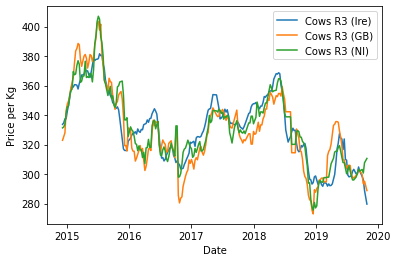

In [14]:
#line graph of Cows U3 to check trends between countries
plt.plot(df["Date"], df["Cows R3 (Ire)"], label = "Cows R3 (Ire)")
plt.plot(df["Date"], df["Cows R3 (GB)"], label = "Cows R3 (GB)")
plt.plot(df["Date"], df["Cows R3 (NI)"], label = "Cows R3 (NI)")
plt.xlabel("Date")
plt.ylabel("Price per Kg")
plt.legend()
plt.show()

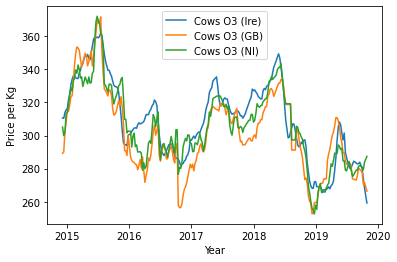

In [15]:
#line graph of Cows O3 to check trends between countries
plt.plot(df["Date"], df["Cows O3 (Ire)"], label = "Cows O3 (Ire)")
plt.plot(df["Date"], df["Cows O3 (GB)"], label = "Cows O3 (GB)")
plt.plot(df["Date"], df["Cows O3 (NI)"], label = "Cows O3 (NI)")
plt.xlabel("Year")
plt.ylabel("Price per Kg")
plt.legend()
plt.show()

In [16]:
#adding month column and year column to dataframe
df['month'] = pd.DatetimeIndex(df['Date']).month
df['year'] = pd.DatetimeIndex(df['Date']).year

In [17]:
#creating dataframes to make it easy for yearly data to be graphed by year

df_2019 = df.loc[df['year'].isin([2019])]
df_2018 = df.loc[df['year'].isin([2018])]
df_2017 = df.loc[df['year'].isin([2017])]
df_2016 = df.loc[df['year'].isin([2016])]
df_2015 = df.loc[df['year'].isin([2015])]
df_2014 = df.loc[df['year'].isin([2014])]

In [18]:
#checking the data types
df.dtypes

Date                   datetime64[ns]
Bulls R3 (Ire)                 object
Cows O2 (Ire)                  object
Cows O3 (Ire)                  object
Cows O4 (Ire)                  object
                            ...      
Young Bulls R3 (NI)            object
Young Bulls U2 (NI)            object
Young Bulls U3 (NI)            object
month                           int64
year                            int64
Length: 88, dtype: object

In [19]:
#checking data types
df_ire.dtypes

Date                    datetime64[ns]
Bulls R3 (Ire)                 float64
Cows O2 (Ire)                  float64
Cows O3 (Ire)                  float64
Cows O4 (Ire)                  float64
Cows P2 (Ire)                  float64
Cows P3 (Ire)                  float64
Cows R2 (lre)                  float64
Cows R3 (Ire)                  float64
Cows R4 (Ire)                  float64
Heifers O2 (Ire)               float64
Heifers O3 (Ire)               float64
Heifers O4 (Ire)               float64
Heifers R2 (Ire)               float64
Heifers R3 (Ire)               float64
Heifers R4 (Ire)               float64
Heifers U2 (Ire)               float64
Heifers U3 (Ire)               float64
Steers O3 (Ire)                float64
Steers O4 (Ire)                float64
Steers R3 (Ire)                float64
Steers R4 (Ire)                float64
Steers U2 (Ire)                float64
Steers U3 (Ire)                float64
Steers U4 (Ire)                float64
Young Bulls O2 (Ire)     

<AxesSubplot:xlabel='Cows O3 (Ire)'>

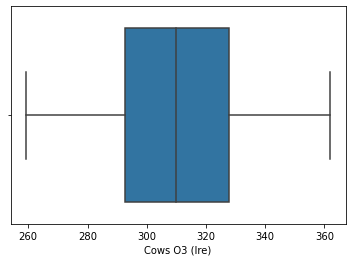

In [20]:
#checking for outliers
sns.boxplot(x=df["Cows O3 (Ire)"])

In [21]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

month    6.0
year     2.0
dtype: float64


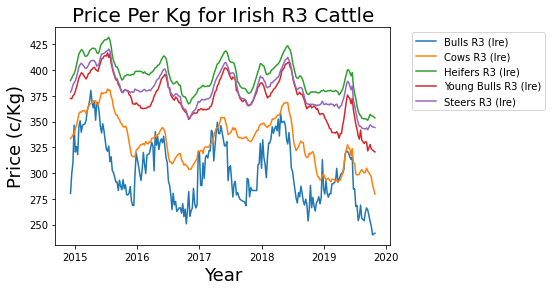

In [22]:
#plot the differnt animal types to check prices compared to each other
plt.plot(df["Date"], df["Bulls R3 (Ire)"], label = "Bulls R3 (Ire)")
plt.plot(df["Date"], df["Cows R3 (Ire)"], label = "Cows R3 (Ire)")
plt.plot(df["Date"], df["Heifers R3 (Ire)"], label = "Heifers R3 (Ire)")
plt.plot(df["Date"], df["Young Bulls R3 (Ire)"], label = "Young Bulls R3 (Ire)")
plt.plot(df["Date"], df["Steers R3 (Ire)"], label = "Steers R3 (Ire)")

plt.xlabel("Year",  fontsize=18)
plt.ylabel("Price (c/Kg)", fontsize=18)
plt.title("Price Per Kg for Irish R3 Cattle", fontsize = 20)
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.show()

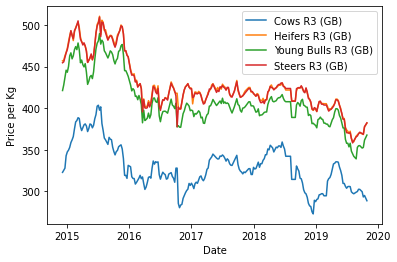

In [23]:
#plot the differnt animal types to check prices to each other in Great Britain

plt.plot(df["Date"], df["Cows R3 (GB)"], label = "Cows R3 (GB)")
plt.plot(df["Date"], df["Heifers R3 (GB)"], label = "Heifers R3 (GB)")
plt.plot(df["Date"], df["Young Bulls R3 (GB)"], label = "Young Bulls R3 (GB)")
plt.plot(df["Date"], df["Steers R3 (GB)"], label = "Steers R3 (GB)")

plt.xlabel("Date")
plt.ylabel("Price per Kg")

plt.legend()
plt.show()

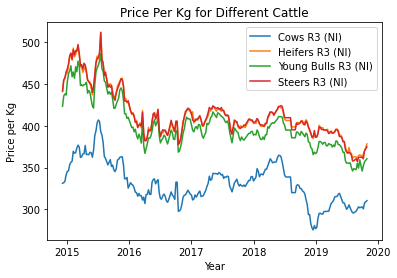

In [24]:
#plot the differnt animal types to check prices compared to each other in N. Ireland

plt.plot(df["Date"], df["Cows R3 (NI)"], label = "Cows R3 (NI)")
plt.plot(df["Date"], df["Heifers R3 (NI)"], label = "Heifers R3 (NI)")
plt.plot(df["Date"], df["Young Bulls R3 (NI)"], label = "Young Bulls R3 (NI)")
plt.plot(df["Date"], df["Steers R3 (NI)"], label = "Steers R3 (NI)")

plt.xlabel("Year")
plt.ylabel("Price per Kg")
plt.title('Price Per Kg for Different Cattle')
plt.legend()
plt.show()

In [25]:
#calculating mean prices for Animals in Ireland
mean_R3cows_Ire= df["Cows R3 (Ire)"].mean()
mean_R3Heifers_Ire= df["Heifers R3 (Ire)"].mean()
mean_R3Steers_Ire= df["Steers R3 (Ire)"].mean()
mean_R3YB_Ire= df["Young Bulls R3 (Ire)"].mean()


sd_R3Cows_Ire = df["Cows R3 (Ire)"].std()
sd_R3Heifers_Ire = df["Heifers R3 (Ire)"].std()
sd_R3Steers_Ire = df["Steers R3 (Ire)"].std()
sd_R3YB_Ire = df["Young Bulls R3 (Ire)"].std()

print('Ire mean price for cows:', mean_R3cows_Ire, 'with sd:', sd_R3Cows_Ire)
print('Ire mean price for Heifers:', mean_R3Heifers_Ire, 'with sd:', sd_R3Heifers_Ire)
print('Ire mean price for Steers:', mean_R3Steers_Ire, 'with sd:', sd_R3Steers_Ire)
print('Ire mean price for Young Bulls:', mean_R3YB_Ire, 'with sd:', sd_R3YB_Ire)


Ire mean price for cows: 331.4880578512395 with sd: 23.447887799767773
Ire mean price for Heifers: 394.2638842975204 with sd: 17.57860779668131
Ire mean price for Steers: 381.86632231404957 with sd: 17.527636509387857
Ire mean price for Young Bulls: 373.82747933884303 with sd: 20.37102426780471


In [26]:
#calculating mean prices for Animals in GB
mean_R3cows_GB= df["Cows R3 (GB)"].mean()
mean_R3Heifers_GB= df["Heifers R3 (GB)"].mean()
mean_R3Steers_GB= df["Steers R3 (GB)"].mean()
mean_R3YB_GB= df["Young Bulls R3 (GB)"].mean()


sd_R3Cows_GB = df["Cows R3 (GB)"].std()
sd_R3Heifers_GB = df["Heifers R3 (GB)"].std()
sd_R3Steers_GB = df["Steers R3 (GB)"].std()
sd_R3YB_GB = df["Young Bulls R3 (GB)"].std()

print('GB mean price for cows:', mean_R3cows_GB, 'with sd:', sd_R3Cows_GB)
print('GB mean price for Heifers:', mean_R3Steers_GB, 'with sd:', sd_R3Heifers_GB)
print('GB mean price for Steers:', mean_R3Steers_GB, 'with sd:', sd_R3Steers_GB)
print('GB mean price for Young Bulls:', mean_R3cows_GB, 'with sd:', sd_R3YB_GB)


GB mean price for cows: 329.53439256198345 with sd: 27.091939386404675
GB mean price for Heifers: 427.2983677685951 with sd: 33.51435621164472
GB mean price for Steers: 427.2983677685951 with sd: 33.586292393470636
GB mean price for Young Bulls: 329.53439256198345 with sd: 31.34874946802331


In [27]:
mean_R3cows_NI= df["Cows R3 (NI)"].mean()
mean_R3Heifers_NI= df["Heifers R3 (NI)"].mean()
mean_R3Steers_NI= df["Steers R3 (NI)"].mean()
mean_R3YB_NI= df["Young Bulls R3 (NI)"].mean()


sd_R3Cows_NI = df["Cows R3 (NI)"].std()
sd_R3Heifers_NI = df["Heifers R3 (NI)"].std()
sd_R3Steers_NI = df["Steers R3 (NI)"].std()
sd_R3YB_NI = df["Young Bulls R3 (NI)"].std()

print('NI mean price for cows:', mean_R3cows_NI, 'with sd:', sd_R3Cows_NI)
print('NI mean price for Heifers:', mean_R3Steers_NI, 'with sd:', sd_R3Heifers_NI)
print('NI mean price for Steers:', mean_R3Steers_NI, 'with sd:', sd_R3Steers_NI)
print('NI mean price for Young Bulls:', mean_R3cows_NI, 'with sd:', sd_R3YB_NI)

NI mean price for cows: 331.0608305785126 with sd: 25.15931731917676
NI mean price for Heifers: 414.0744752066116 with sd: 30.22950596297418
NI mean price for Steers: 414.0744752066116 with sd: 30.637019773724166
NI mean price for Young Bulls: 331.0608305785126 with sd: 29.540467892134945


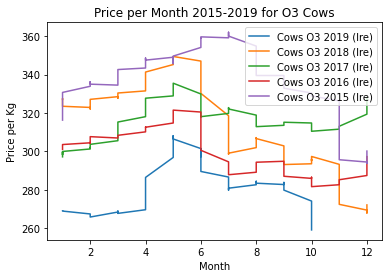

In [30]:
#line graph of O3 Ire Cows for each month from 2015 to 2019

plt.plot(df_2019["month"], df_2019["Cows O3 (Ire)"], label = "Cows O3 2019 (Ire)")
plt.plot(df_2018["month"], df_2018["Cows O3 (Ire)"], label = "Cows O3 2018 (Ire)")
plt.plot(df_2017["month"], df_2017["Cows O3 (Ire)"], label = "Cows O3 2017 (Ire)")
plt.plot(df_2016["month"], df_2016["Cows O3 (Ire)"], label = "Cows O3 2016 (Ire)")
plt.plot(df_2015["month"], df_2015["Cows O3 (Ire)"], label = "Cows O3 2015 (Ire)")


plt.xlabel("Month")
plt.ylabel("Price per Kg")
plt.title('Price per Month 2015-2019 for O3 Cows')
plt.legend()
plt.show()

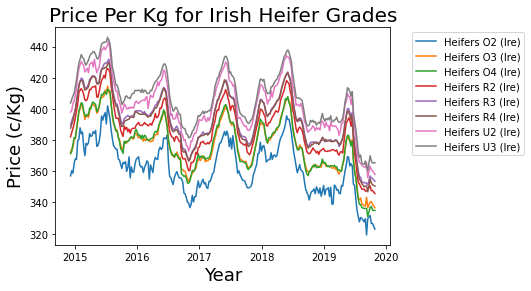

In [31]:
#line graph of Different graded animals
plt.plot(df["Date"], df["Heifers O2 (Ire)"], label = "Heifers O2 (Ire)")
plt.plot(df["Date"], df["Heifers O3 (Ire)"], label = "Heifers O3 (Ire)")
plt.plot(df["Date"], df["Heifers O4 (Ire)"], label = "Heifers O4 (Ire)")
plt.plot(df["Date"], df["Heifers R2 (Ire)"], label = "Heifers R2 (Ire)")
plt.plot(df["Date"], df["Heifers R3 (Ire)"], label = "Heifers R3 (Ire)")
plt.plot(df["Date"], df["Heifers R4 (Ire)"], label = "Heifers R4 (Ire)")
plt.plot(df["Date"], df["Heifers U2 (Ire)"], label = "Heifers U2 (Ire)")
plt.plot(df["Date"], df["Heifers U3 (Ire)"], label = "Heifers U3 (Ire)")

plt.xlabel("Year",  fontsize=18)
plt.ylabel("Price (c/Kg)", fontsize=18)
plt.title("Price Per Kg for Irish Heifer Grades", fontsize = 20)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')


plt.show()

In [32]:
#calculating mean price and standard deviation for different graded Irish Heifers
mean_O2Heifers_Ire= df["Heifers O2 (Ire)"].mean()
mean_O3Heifers_Ire= df["Heifers O3 (Ire)"].mean()
mean_O4Heifers_Ire= df["Heifers O4 (Ire)"].mean()
mean_R2Heifers_Ire= df["Heifers R2 (Ire)"].mean()
mean_R3Heifers_Ire= df["Heifers R3 (Ire)"].mean()
mean_R4Heifers_Ire= df["Heifers R4 (Ire)"].mean()
mean_U2Heifers_Ire= df["Heifers U2 (Ire)"].mean()
mean_U3Heifers_Ire= df["Heifers U3 (Ire)"].mean()


sd_O2Heifers_Ire = df["Heifers O2 (Ire)"].std()
sd_O3Heifers_Ire = df["Heifers O3 (Ire)"].std()
sd_O4Heifers_Ire = df["Heifers O4 (Ire)"].std()
sd_R2Heifers_Ire = df["Heifers R2 (Ire)"].std()
sd_R3Heifers_Ire = df["Heifers R3 (Ire)"].std()
sd_R4Heifers_Ire = df["Heifers R4 (Ire)"].std()
sd_U2Heifers_Ire = df["Heifers U2 (Ire)"].std()
sd_U3Heifers_Ire = df["Heifers U3 (Ire)"].std()


print('Ire mean price for O2 Heifers:', mean_O2Heifers_Ire, 'with sd:', sd_O2Heifers_Ire)
print('Ire mean price for O3 Heifers:', mean_O3Heifers_Ire, 'with sd:', sd_O3Heifers_Ire)
print('Ire mean price for O4 Heifers:', mean_O4Heifers_Ire, 'with sd:', sd_O4Heifers_Ire)
print('Ire mean price for R2 Heifers:', mean_R2Heifers_Ire, 'with sd:', sd_R2Heifers_Ire)
print('Ire mean price for R3 Heifers:', mean_R3Heifers_Ire, 'with sd:', sd_R3Heifers_Ire)
print('Ire mean price for R4 Heifers:', mean_R4Heifers_Ire, 'with sd:', sd_R4Heifers_Ire)
print('Ire mean price for U2 Heifers:', mean_U2Heifers_Ire, 'with sd:', sd_U2Heifers_Ire)
print('Ire mean price for U3 Heifers:', mean_U3Heifers_Ire, 'with sd:', sd_U3Heifers_Ire)

Ire mean price for O2 Heifers: 362.6126859504133 with sd: 16.426681053459458
Ire mean price for O3 Heifers: 377.5654958677684 with sd: 16.736807449810016
Ire mean price for O4 Heifers: 377.7178099173552 with sd: 17.47372554423509
Ire mean price for R2 Heifers: 387.7660743801655 with sd: 17.31409681230817
Ire mean price for R3 Heifers: 394.2638842975204 with sd: 17.57860779668131
Ire mean price for R4 Heifers: 393.25454545454534 with sd: 17.67244379562554
Ire mean price for U2 Heifers: 403.2376033057848 with sd: 18.241345678357543
Ire mean price for U3 Heifers: 408.0223553719006 with sd: 18.242142304016593


In [33]:
from tabulate import tabulate
table = [['Unit','O2 Heifers','O3 Heifers','R2 Heifers', 'R3 Heifers' ,'U2 Heifers', 'U3 Heifers'],
    ['Mean (c/kg)', mean_O2Heifers_Ire,mean_O3Heifers_Ire,  mean_R2Heifers_Ire, mean_R3Heifers_Ire,mean_U2Heifers_Ire,mean_U3Heifers_Ire],
         ['Std Dev',sd_O2Heifers_Ire, sd_O3Heifers_Ire, sd_R2Heifers_Ire, sd_R3Heifers_Ire,sd_U2Heifers_Ire,sd_U3Heifers_Ire]]

print(tabulate(table, headers='firstrow',tablefmt='fancy_grid', numalign='left'))

╒═════════════╤══════════════╤══════════════╤══════════════╤══════════════╤══════════════╤══════════════╕
│ Unit        │ O2 Heifers   │ O3 Heifers   │ R2 Heifers   │ R3 Heifers   │ U2 Heifers   │ U3 Heifers   │
╞═════════════╪══════════════╪══════════════╪══════════════╪══════════════╪══════════════╪══════════════╡
│ Mean (c/kg) │ 362.613      │ 377.565      │ 387.766      │ 394.264      │ 403.238      │ 408.022      │
├─────────────┼──────────────┼──────────────┼──────────────┼──────────────┼──────────────┼──────────────┤
│ Std Dev     │ 16.4267      │ 16.7368      │ 17.3141      │ 17.5786      │ 18.2413      │ 18.2421      │
╘═════════════╧══════════════╧══════════════╧══════════════╧══════════════╧══════════════╧══════════════╛


In [34]:
#calculating mean price and standard deviation for different graded Irish Steers

mean_O3Steers_Ire= df["Steers O3 (Ire)"].mean()
mean_O4Steers_Ire= df["Steers O4 (Ire)"].mean()
mean_R3Steers_Ire= df["Steers R3 (Ire)"].mean()
mean_R4Steers_Ire= df["Steers R4 (Ire)"].mean()
mean_U2Steers_Ire= df["Steers U2 (Ire)"].mean()
mean_U3Steers_Ire= df["Steers U3 (Ire)"].mean()



sd_O3Steers_Ire = df["Steers O3 (Ire)"].std()
sd_O4Steers_Ire = df["Steers O4 (Ire)"].std()
sd_R3Steers_Ire = df["Steers R3 (Ire)"].std()
sd_R4Steers_Ire = df["Steers R4 (Ire)"].std()
sd_U2Steers_Ire = df["Steers U2 (Ire)"].std()
sd_U3Steers_Ire = df["Steers U3 (Ire)"].std()


print('Ire mean price for O3 Steers:', mean_O3Steers_Ire, 'with sd:', sd_O3Steers_Ire)
print('Ire mean price for O4 Steers:', mean_O4Steers_Ire, 'with sd:', sd_O4Steers_Ire)
print('Ire mean price for R3 Steers:', mean_R3Steers_Ire, 'with sd:', sd_R3Steers_Ire)
print('Ire mean price for R4 Steers:', mean_R4Steers_Ire, 'with sd:', sd_R4Steers_Ire)
print('Ire mean price for U2 Steers:', mean_U2Steers_Ire, 'with sd:', sd_U2Steers_Ire)
print('Ire mean price for U3 Steers:', mean_U3Steers_Ire, 'with sd:', sd_U3Steers_Ire)

Ire mean price for O3 Steers: 364.39900826446285 with sd: 17.66497406043802
Ire mean price for O4 Steers: 366.2197933884299 with sd: 18.797808127905924
Ire mean price for R3 Steers: 381.86632231404957 with sd: 17.527636509387857
Ire mean price for R4 Steers: 381.4351652892562 with sd: 17.875664725868326
Ire mean price for U2 Steers: 388.5334710743801 with sd: 17.59427232388551
Ire mean price for U3 Steers: 392.18814049586825 with sd: 18.150178589615884


In [35]:
from tabulate import tabulate
table = [['Unit','O3 Steers','O4 Steers','R3 Steers', 'R4 Steers' ,'U2 Steers', 'U3 Steers'],
    ['Mean (c/kg))', mean_O3Steers_Ire,mean_O4Steers_Ire,  mean_R3Steers_Ire, mean_R4Steers_Ire,mean_U2Steers_Ire,mean_U3Steers_Ire],
         ['Std Dev',sd_O3Steers_Ire, sd_O4Steers_Ire, sd_R3Steers_Ire, sd_R4Steers_Ire,sd_U2Steers_Ire,sd_U3Steers_Ire]]

print(tabulate(table, headers='firstrow',tablefmt='fancy_grid', numalign='left'))

╒══════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╕
│ Unit         │ O3 Steers   │ O4 Steers   │ R3 Steers   │ R4 Steers   │ U2 Steers   │ U3 Steers   │
╞══════════════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════════╡
│ Mean (c/kg)) │ 364.399     │ 366.22      │ 381.866     │ 381.435     │ 388.533     │ 392.188     │
├──────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┤
│ Std Dev      │ 17.665      │ 18.7978     │ 17.5276     │ 17.8757     │ 17.5943     │ 18.1502     │
╘══════════════╧═════════════╧═════════════╧═════════════╧═════════════╧═════════════╧═════════════╛


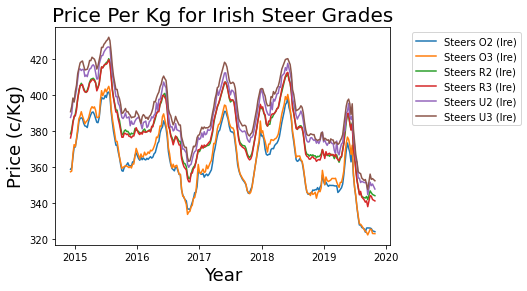

In [36]:
#line graph of Different graded Irish Steers
plt.plot(df["Date"], df["Steers O3 (Ire)"], label = "Steers O2 (Ire)")
plt.plot(df["Date"], df["Steers O4 (Ire)"], label = "Steers O3 (Ire)")
plt.plot(df["Date"], df["Steers R3 (Ire)"], label = "Steers R2 (Ire)")
plt.plot(df["Date"], df["Steers R4 (Ire)"], label = "Steers R3 (Ire)")
plt.plot(df["Date"], df["Steers U2 (Ire)"], label = "Steers U2 (Ire)")
plt.plot(df["Date"], df["Steers U3 (Ire)"], label = "Steers U3 (Ire)")

plt.xlabel("Year",  fontsize=18)
plt.ylabel("Price (c/Kg)", fontsize=18)
plt.title("Price Per Kg for Irish Steer Grades", fontsize = 20)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

/Users/Noel/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


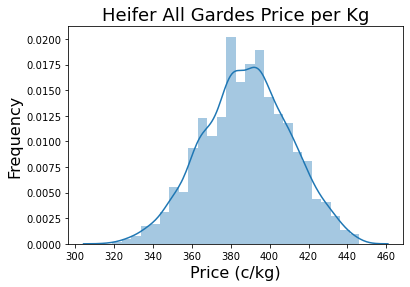

In [37]:
#checking distribution of Irish Heifer Price of all grades
sns.distplot(df.loc[:,'Heifers O2 (Ire)':"Heifers U3 (Ire)"])
plt.title('Heifer All Gardes Price per Kg', fontsize=18)
plt.xlabel('Price (c/kg)', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

plt.show()

/Users/Noel/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


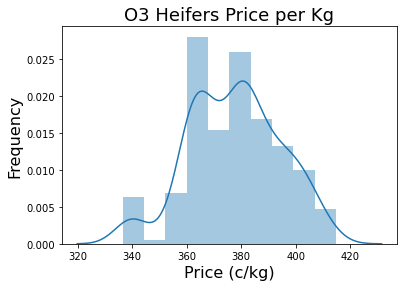

In [38]:
#checking distribution of the Heifers Price
sns.distplot(df["Heifers O3 (Ire)"])
plt.title('O3 Heifers Price per Kg', fontsize=18)
plt.xlabel('Price (c/kg)', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

plt.show()

/Users/Noel/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


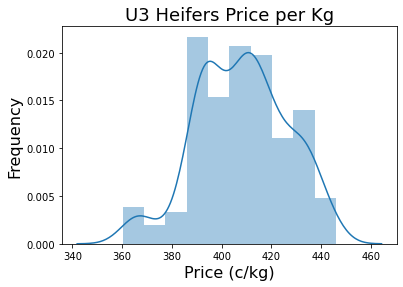

In [39]:
#checking distribution of the Heifers Price
sns.distplot(df["Heifers U3 (Ire)"])
plt.title('U3 Heifers Price per Kg', fontsize=18)
plt.xlabel('Price (c/kg)', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

plt.show()

In [46]:
#create interactive graph using plotly
import plotly.express as px

fig = px.line(df, x="Date", y=["Heifers U3 (Ire)", "Heifers O3 (Ire)", "Heifers R3 (Ire)","Heifers U2 (Ire)","Heifers O2 (Ire)","Heifers R2 (Ire)"],
             labels={
                'x':"Animal Grade",
                'value':"Price (c/Kg)"
            },
             title="Mean Price per Kg For Different Irish Heifer Grades")

fig.update_xaxes(title_font=dict(size=18, family='Courier', color='black'))
fig.update_yaxes(title_font=dict(size=18, family='Courier', color='black'))
fig.show()

In [41]:
import plotly.express as px

fig = px.line(df, x="Date", y=["Heifers U3 (Ire)", "Heifers O3 (GB)", "Heifers R3 (NI)"],
             labels={
                'x':"Animal Grade",
                'value':"Price (c/Kg)"
            },
             title="Mean Price per Kg For NI Heifers")

fig.update_xaxes(title_font=dict(size=18, family='Courier', color='black'))
fig.update_yaxes(title_font=dict(size=18, family='Courier', color='black'))
fig.show()

/Users/Noel/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



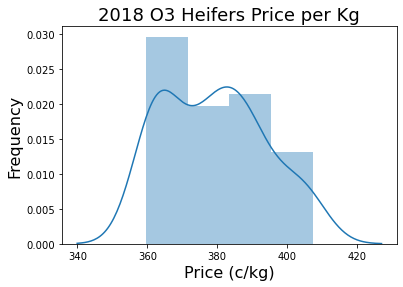

In [42]:
#checking distribution of the Heifers Price
sns.distplot(df_2018["Heifers O3 (Ire)"])
plt.title('2018 O3 Heifers Price per Kg', fontsize=18)
plt.xlabel('Price (c/kg)', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

plt.show()

/Users/Noel/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



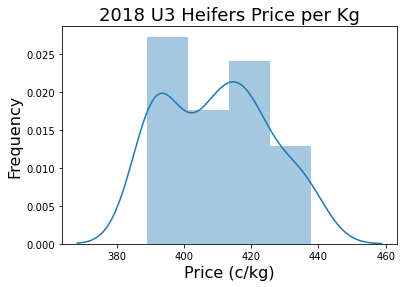

In [43]:
#checking distribution of the Heifers Price
sns.distplot(df_2018["Heifers U3 (Ire)"])
plt.title('2018 U3 Heifers Price per Kg', fontsize=18)
plt.xlabel('Price (c/kg)', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

plt.show()

/Users/Noel/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



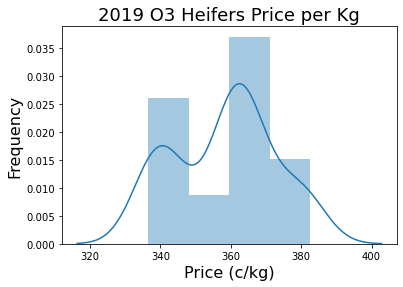

In [44]:
#checking distribution of the Heifers Price
sns.distplot(df_2019["Heifers O3 (Ire)"])
plt.title('2019 O3 Heifers Price per Kg', fontsize=18)
plt.xlabel('Price (c/kg)', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

plt.show()

/Users/Noel/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



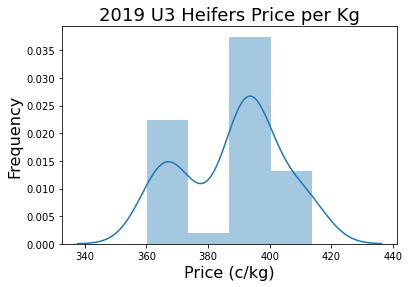

In [45]:
#checking distribution of the Heifers Price
sns.distplot(df_2019["Heifers U3 (Ire)"])
plt.title('2019 U3 Heifers Price per Kg', fontsize=18)
plt.xlabel('Price (c/kg)', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

plt.show()

/Users/Noel/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



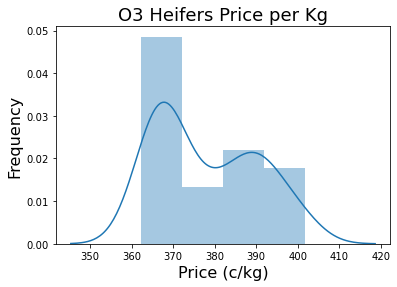

In [47]:
#checking distribution of the Heifers Price
sns.distplot(df_2017["Heifers O3 (Ire)"])
plt.title('O3 Heifers Price per Kg', fontsize=18)
plt.xlabel('Price (c/kg)', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

plt.show()

In [48]:
#calculating mean and average prices
mean_O2Heifers_GB= df["Heifers O2 (GB)"].mean()
mean_O3Heifers_GB= df["Heifers O3 (GB)"].mean()
mean_O4Heifers_GB= df["Heifers O4 (GB)"].mean()
mean_R2Heifers_GB= df["Heifers R2 (GB)"].mean()
mean_R3Heifers_GB= df["Heifers R3 (GB)"].mean()
mean_R4Heifers_GB= df["Heifers R4 (GB)"].mean()
mean_U2Heifers_GB= df["Heifers U2 (GB)"].mean()
mean_U3Heifers_GB= df["Heifers U3 (GB)"].mean()


sd_O2Heifers_GB = df["Heifers O2 (GB)"].std()
sd_O3Heifers_GB = df["Heifers O3 (GB)"].std()
sd_O4Heifers_GB = df["Heifers O4 (GB)"].std()
sd_R2Heifers_GB = df["Heifers R2 (GB)"].std()
sd_R3Heifers_GB = df["Heifers R3 (GB)"].std()
sd_R4Heifers_GB = df["Heifers R4 (GB)"].std()
sd_U2Heifers_GB = df["Heifers U2 (GB)"].std()
sd_U3Heifers_GB = df["Heifers U3 (GB)"].std()

print('GB mean price for O2 Heifers:', mean_O2Heifers_GB, 'with sd:', sd_O2Heifers_GB)
print('GB mean price for O3 Heifers:', mean_O3Heifers_GB, 'with sd:', sd_O3Heifers_GB)
print('GB mean price for O4 Heifers:', mean_O4Heifers_GB, 'with sd:', sd_O4Heifers_GB)
print('GB mean price for R2 Heifers:', mean_R2Heifers_GB, 'with sd:', sd_R2Heifers_GB)
print('GB mean price for R3 Heifers:', mean_R3Heifers_GB, 'with sd:', sd_R3Heifers_GB)
print('GB mean price for R4 Heifers:', mean_R4Heifers_GB, 'with sd:', sd_R4Heifers_GB)
print('GB mean price for U2 Heifers:', mean_U2Heifers_GB, 'with sd:', sd_U2Heifers_GB)
print('GB mean price for U3 Heifers:', mean_U3Heifers_GB, 'with sd:', sd_U3Heifers_GB)

GB mean price for O2 Heifers: 371.7800330578514 with sd: 32.38074109801988
GB mean price for O3 Heifers: 400.11592148760275 with sd: 31.028819156769725
GB mean price for O4 Heifers: 411.21421487603334 with sd: 32.08404466183075
GB mean price for R2 Heifers: 419.51980165289245 with sd: 33.66816661817769
GB mean price for R3 Heifers: 427.99064049586775 with sd: 33.51435621164472
GB mean price for R4 Heifers: 428.7463305785125 with sd: 33.432992074105385
GB mean price for U2 Heifers: 436.1588181818183 with sd: 35.86733520751112
GB mean price for U3 Heifers: 440.2365454545454 with sd: 35.72139726558592


In [49]:
from tabulate import tabulate
table = [['Grade','O2 Heifers','O3 Heifers','R2 Heifers', 'R3 Heifers' ,'U2 Heifers', 'U3 Heifers'],
    ['Price (c/Kg)', mean_O2Heifers_GB,mean_O3Heifers_GB,  mean_R2Heifers_GB, mean_R3Heifers_GB,mean_U2Heifers_GB,mean_U3Heifers_GB],
         ['Std Dev',sd_O2Heifers_GB, sd_O3Heifers_GB, sd_R2Heifers_GB, sd_R3Heifers_GB,sd_U2Heifers_GB,sd_U3Heifers_GB]]

print(tabulate(table, headers='firstrow',tablefmt='fancy_grid', numalign='left'))

╒══════════════╤══════════════╤══════════════╤══════════════╤══════════════╤══════════════╤══════════════╕
│ Grade        │ O2 Heifers   │ O3 Heifers   │ R2 Heifers   │ R3 Heifers   │ U2 Heifers   │ U3 Heifers   │
╞══════════════╪══════════════╪══════════════╪══════════════╪══════════════╪══════════════╪══════════════╡
│ Price (c/Kg) │ 371.78       │ 400.116      │ 419.52       │ 427.991      │ 436.159      │ 440.237      │
├──────────────┼──────────────┼──────────────┼──────────────┼──────────────┼──────────────┼──────────────┤
│ Std Dev      │ 32.3807      │ 31.0288      │ 33.6682      │ 33.5144      │ 35.8673      │ 35.7214      │
╘══════════════╧══════════════╧══════════════╧══════════════╧══════════════╧══════════════╧══════════════╛


In [50]:
#calculating mean and average prices
mean_O2Heifers_NI= df["Heifers O2 (NI)"].mean()
mean_O3Heifers_NI= df["Heifers O3 (NI)"].mean()
mean_O4Heifers_NI= df["Heifers O4 (NI)"].mean()
mean_R2Heifers_NI= df["Heifers R2 (NI)"].mean()
mean_R3Heifers_NI= df["Heifers R3 (NI)"].mean()
mean_R4Heifers_NI= df["Heifers R4 (NI)"].mean()
mean_U2Heifers_NI= df["Heifers U2 (NI)"].mean()
mean_U3Heifers_NI= df["Heifers U3 (NI)"].mean()


sd_O2Heifers_NI = df["Heifers O2 (NI)"].std()
sd_O3Heifers_NI = df["Heifers O3 (NI)"].std()
sd_O4Heifers_NI = df["Heifers O4 (NI)"].std()
sd_R2Heifers_NI = df["Heifers R2 (NI)"].std()
sd_R3Heifers_NI = df["Heifers R3 (NI)"].std()
sd_R4Heifers_NI = df["Heifers R4 (NI)"].std()
sd_U2Heifers_NI = df["Heifers U2 (NI)"].std()
sd_U3Heifers_NI = df["Heifers U3 (NI)"].std()

print('NI mean price for O2 Heifers:', mean_O2Heifers_NI, 'with sd:', sd_O2Heifers_NI)
print('NI mean price for O3 Heifers:', mean_O3Heifers_NI, 'with sd:', sd_O3Heifers_NI)
print('NI mean price for O4 Heifers:', mean_O4Heifers_NI, 'with sd:', sd_O4Heifers_NI)
print('NI mean price for R2 Heifers:', mean_R2Heifers_NI, 'with sd:', sd_R2Heifers_NI)
print('NI mean price for R3 Heifers:', mean_R3Heifers_NI, 'with sd:', sd_R3Heifers_NI)
print('NI mean price for R4 Heifers:', mean_R4Heifers_NI, 'with sd:', sd_R4Heifers_NI)
print('NI mean price for U2 Heifers:', mean_U2Heifers_NI, 'with sd:', sd_U2Heifers_NI)
print('NI mean price for U3 Heifers:', mean_U3Heifers_NI, 'with sd:', sd_U3Heifers_NI)

NI mean price for O2 Heifers: 390.3994462809916 with sd: 27.175337241361873
NI mean price for O3 Heifers: 402.1422644628101 with sd: 27.110071309284663
NI mean price for O4 Heifers: 402.65645041322296 with sd: 27.057157832228274
NI mean price for R2 Heifers: 409.2586157024791 with sd: 30.140348322077898
NI mean price for R3 Heifers: 413.98649173553713 with sd: 30.22950596297418
NI mean price for R4 Heifers: 410.7081404958677 with sd: 29.405682873663828
NI mean price for U2 Heifers: 416.8062851239666 with sd: 31.322666817522432
NI mean price for U3 Heifers: 419.725888429752 with sd: 31.723157146151934


In [51]:
from tabulate import tabulate
table = [['Grade','O2 Heifers','O3 Heifers','R2 Heifers', 'R3 Heifers' ,'U2 Heifers', 'U3 Heifers'],
    ['Price (c/Kg)', mean_O2Heifers_NI,mean_O3Heifers_NI,  mean_R2Heifers_NI, mean_R3Heifers_NI,mean_U2Heifers_NI,mean_U3Heifers_NI],
         ['Std Dev',sd_O2Heifers_NI, sd_O3Heifers_NI, sd_R2Heifers_NI, sd_R3Heifers_NI,sd_U2Heifers_NI,sd_U3Heifers_NI]]

print(tabulate(table, headers='firstrow',tablefmt='fancy_grid', numalign='left'))

╒══════════════╤══════════════╤══════════════╤══════════════╤══════════════╤══════════════╤══════════════╕
│ Grade        │ O2 Heifers   │ O3 Heifers   │ R2 Heifers   │ R3 Heifers   │ U2 Heifers   │ U3 Heifers   │
╞══════════════╪══════════════╪══════════════╪══════════════╪══════════════╪══════════════╪══════════════╡
│ Price (c/Kg) │ 390.399      │ 402.142      │ 409.259      │ 413.986      │ 416.806      │ 419.726      │
├──────────────┼──────────────┼──────────────┼──────────────┼──────────────┼──────────────┼──────────────┤
│ Std Dev      │ 27.1753      │ 27.1101      │ 30.1403      │ 30.2295      │ 31.3227      │ 31.7232      │
╘══════════════╧══════════════╧══════════════╧══════════════╧══════════════╧══════════════╧══════════════╛


In [52]:
#calculating mean and average prices

mean_O3Steers_NI= df["Steers O3 (NI)"].mean()
mean_O4Steers_NI= df["Steers O4 (NI)"].mean()
mean_R3Steers_NI= df["Steers R3 (NI)"].mean()
mean_R4Steers_NI= df["Steers R4 (NI)"].mean()
mean_U2Steers_NI= df["Steers U2 (NI)"].mean()
mean_U3Steers_NI= df["Steers U3 (NI)"].mean()



sd_O3Steers_NI = df["Steers O3 (NI)"].std()
sd_O4Steers_NI = df["Steers O4 (NI)"].std()
sd_R3Steers_NI = df["Steers R3 (NI)"].std()
sd_R4Steers_NI = df["Steers R4 (NI)"].std()
sd_U2Steers_NI = df["Steers U2 (NI)"].std()
sd_U3Steers_NI = df["Steers U3 (NI)"].std()


print('NI mean price for O3 Steers:', mean_O3Steers_NI, 'with sd:', sd_O3Steers_NI)
print('NI mean price for O4 Steers:', mean_O4Steers_NI, 'with sd:', sd_O4Steers_NI)
print('NI mean price for R3 Steers:', mean_R3Steers_NI, 'with sd:', sd_R3Steers_NI)
print('NI mean price for R4 Steers:', mean_R4Steers_NI, 'with sd:', sd_R4Steers_NI)
print('NI mean price for U2 Steers:', mean_U2Steers_NI, 'with sd:', sd_U2Steers_NI)
print('NI mean price for U3 Steers:', mean_U3Steers_NI, 'with sd:', sd_U3Steers_NI)

NI mean price for O3 Steers: 399.94688429752074 with sd: 26.709403508174628
NI mean price for O4 Steers: 401.5741859504134 with sd: 27.681729241117818
NI mean price for R3 Steers: 414.0744752066116 with sd: 30.637019773724166
NI mean price for R4 Steers: 411.57900826446286 with sd: 30.000070142655446
NI mean price for U2 Steers: 413.3025289256197 with sd: 31.894152539304205
NI mean price for U3 Steers: 415.49966942148797 with sd: 31.88819755387035


In [53]:
#calculating mean and average prices

mean_O3Steers_GB= df["Steers O3 (GB)"].mean()
mean_O4Steers_GB= df["Steers O4 (GB)"].mean()
mean_R3Steers_GB= df["Steers R3 (GB)"].mean()
mean_R4Steers_GB= df["Steers R4 (GB)"].mean()
mean_U2Steers_GB= df["Steers U2 (GB)"].mean()
mean_U3Steers_GB= df["Steers U3 (GB)"].mean()



sd_O3Steers_GB = df["Steers O3 (GB)"].std()
sd_O4Steers_GB = df["Steers O4 (GB)"].std()
sd_R3Steers_GB = df["Steers R3 (GB)"].std()
sd_R4Steers_GB = df["Steers R4 (GB)"].std()
sd_U2Steers_GB = df["Steers U2 (GB)"].std()
sd_U3Steers_GB = df["Steers U3 (GB)"].std()


print('GB mean price for O3 Steers:', mean_O3Steers_GB, 'with sd:', sd_O3Steers_GB)
print('GB mean price for O4 Steers:', mean_O4Steers_GB, 'with sd:', sd_O4Steers_GB)
print('GB mean price for R3 Steers:', mean_R3Steers_GB, 'with sd:', sd_R3Steers_GB)
print('GB mean price for R4 Steers:', mean_R4Steers_GB, 'with sd:', sd_R4Steers_GB)
print('GB mean price for U2 Steers:', mean_U2Steers_GB, 'with sd:', sd_U2Steers_GB)
print('GB mean price for U3 Steers:', mean_U3Steers_GB, 'with sd:', sd_U3Steers_GB)

GB mean price for O3 Steers: 397.66272727272764 with sd: 32.373921818218385
GB mean price for O4 Steers: 408.90373553719036 with sd: 32.96382126014593
GB mean price for R3 Steers: 427.2983677685951 with sd: 33.586292393470636
GB mean price for R4 Steers: 431.1223223140497 with sd: 34.60013100764656
GB mean price for U2 Steers: 432.1499876033056 with sd: 36.39084640976262
GB mean price for U3 Steers: 433.4674710743799 with sd: 36.38081542466978


In [54]:
x = ['O3 Steers', 'O4 Steers', 'R3 Steers', 'R4 Steers', 'U2 Steers', 'U3 Steers']
mean_Ire_S = [mean_O3Steers_Ire,mean_O4Steers_Ire,mean_R3Steers_Ire,mean_R4Steers_Ire,mean_U2Steers_Ire,mean_U3Steers_Ire]

x = [ 'O3 Steers', 'O4 Steers', 'R3 Steers', 'R4 Steers', 'U2 Steers', 'U3 Steers']
mean_NI_S = [mean_O3Steers_NI,mean_O4Steers_NI,mean_R3Steers_NI,mean_R4Steers_NI,mean_U2Steers_NI,mean_U3Steers_NI]

x = [ 'O3 Steers', 'O4 Steers', 'R3 Steers', 'R4 Steers', 'U2 Steers', 'U3 Steers']
mean_GB_S = [mean_O3Steers_GB,mean_O4Steers_GB,mean_R3Steers_GB,mean_R4Steers_GB,mean_U2Steers_GB,mean_U3Steers_GB]

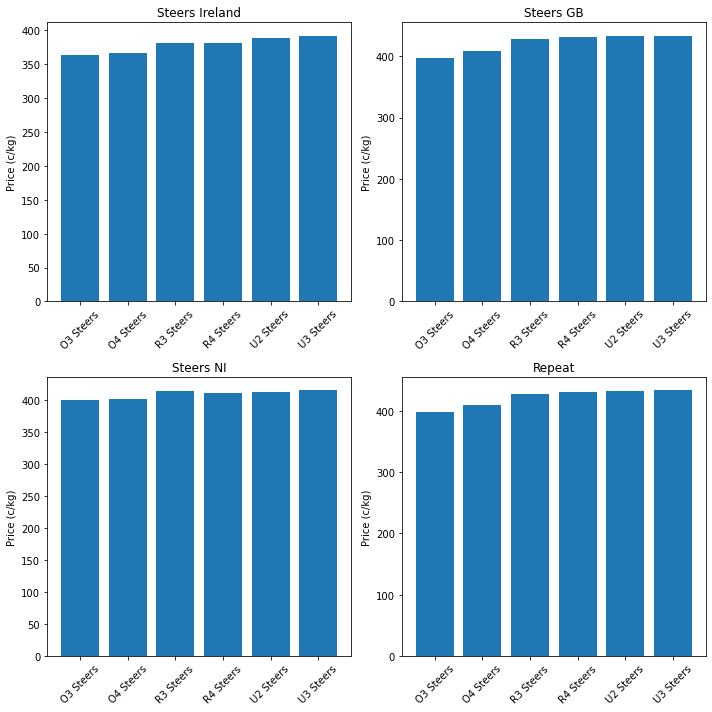

In [55]:
fig, axs = plt.subplots(2, 2, figsize = (10,10))
axs[0, 0].bar(x, mean_Ire_S)
axs[0, 0].set_title("Steers Ireland")
axs[0,0].tick_params(axis='x', rotation=45)
axs[0,0].set_ylabel('Price (c/kg)')


axs[1, 0].bar(x, mean_NI_S)
axs[1, 0].set_title("Steers NI")
axs[1, 0].sharex(axs[0, 0])
axs[1,0].tick_params(axis='x', rotation=45)
axs[1,0].set_ylabel('Price (c/kg)')

axs[0, 1].bar(x, mean_GB_S)
axs[0, 1].set_title("Steers GB")
axs[0,1].tick_params(axis='x', rotation=45)
axs[0,1].set_ylabel('Price (c/kg)')

axs[1, 1].bar(x, mean_GB_S)
axs[1, 1].set_title("Repeat")
axs[1,1].tick_params(axis='x', rotation=45)
axs[1,1].set_ylabel('Price (c/kg)')


fig.tight_layout()

In [56]:
#Assigning mean values of Heifer grades to variable to be graphed
x_Ire = ['O2 Heifers (Ire)', 'O3 Heifers (Ire)', 'O4 Heifers (Ire)', 'R2 Heifers (Ire)', 'R3 Heifers (Ire)', 'R4 Heifers (Ire)', 'U2 Heifers (Ire)', 'U3 Heifers (Ire)']
mean_Ire = [mean_O2Heifers_Ire,mean_O3Heifers_Ire,mean_O4Heifers_Ire,mean_R2Heifers_Ire,mean_R3Heifers_Ire,mean_R4Heifers_Ire,mean_U2Heifers_Ire,mean_U3Heifers_Ire]

x_NI = ['O2 Heifers (NI)', 'O3 Heifers (NI)', 'O4 Heifers (NI)', 'R2 Heifers (NI)', 'R3 Heifers (NI)', 'R4 Heifers (NI)', 'U2 Heifers (NI)', 'U3 Heifers (NI)']
mean_NI = [mean_O2Heifers_NI,mean_O3Heifers_NI,mean_O4Heifers_NI,mean_R2Heifers_NI,mean_R3Heifers_NI,mean_R4Heifers_NI,mean_U2Heifers_NI,mean_U3Heifers_NI]

x_GB = ['O2 Heifers (GB)', 'O3 Heifers (GB)', 'O4 Heifers (GB)', 'R2 Heifers (GB)', 'R3 Heifers (GB)', 'R4 Heifers (GB)', 'U2 Heifers (GB)', 'U3 Heifers (GB)']
mean_GB = [mean_O2Heifers_GB,mean_O3Heifers_GB,mean_O4Heifers_GB,mean_R2Heifers_GB,mean_R3Heifers_GB,mean_R4Heifers_GB,mean_U2Heifers_GB,mean_U3Heifers_GB]

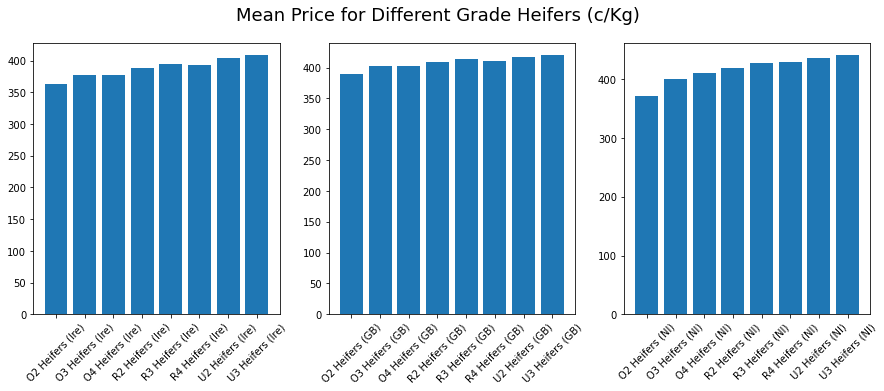

In [57]:
#plotting mean value for heifer grades for different countries
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize= (15,5))
fig.suptitle('Mean Price for Different Grade Heifers (c/Kg)', fontsize =18)
ax1.bar(x_Ire, mean_Ire)
ax1.tick_params(axis='x', rotation=45)
#ax1.ylabel("Price (c/Kg)", fontsize=10)

ax2.bar(x_GB, mean_NI)
ax2.tick_params(axis='x', rotation=45)

ax3.bar(x_NI, mean_GB)
ax3.tick_params(axis='x', rotation=45)

plt.show()

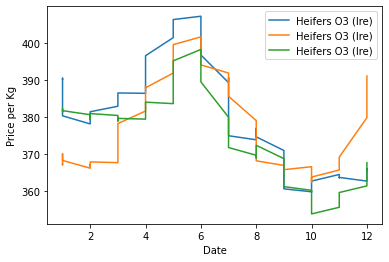

In [58]:
#mean price of O3 Heifers in different years
plt.plot(df_2018["month"], df_2018["Heifers O3 (Ire)"], label = "Heifers O3 (Ire)")
plt.plot(df_2017["month"], df_2017["Heifers O3 (Ire)"], label = "Heifers O3 (Ire)")
plt.plot(df_2016["month"], df_2016["Heifers O3 (Ire)"], label = "Heifers O3 (Ire)")
plt.xlabel("Date")
plt.ylabel("Price per Kg")
plt.legend()
plt.show()

In [59]:
mean_O3Heifers_Ire_2019= df_2019["Heifers O3 (Ire)"].mean()
mean_O3Heifers_Ire_2018= df_2018["Heifers O3 (Ire)"].mean()
mean_O3Heifers_Ire_2017= df_2017["Heifers O3 (Ire)"].mean()
mean_O3Heifers_Ire_2016= df_2016["Heifers O3 (Ire)"].mean()
mean_O3Heifers_Ire_2015= df_2015["Heifers O3 (Ire)"].mean()


sd_O3Heifers_Ire_2019 = df_2019["Heifers O3 (Ire)"].std()
sd_O3Heifers_Ire_2018 = df_2018["Heifers O3 (Ire)"].std()
sd_O3Heifers_Ire_2017 = df_2017["Heifers O3 (Ire)"].std()
sd_O3Heifers_Ire_2016 = df_2016["Heifers O3 (Ire)"].std()
sd_O3Heifers_Ire_2015 = df_2015["Heifers O3 (Ire)"].std()

print('Ire mean price for O3 Heifers 2019:', mean_O3Heifers_Ire_2019, 'with sd:', sd_O3Heifers_Ire_2019)
print('Ire mean price for O3 Heifers 2018:', mean_O3Heifers_Ire_2018, 'with sd:', sd_O3Heifers_Ire_2018)
print('Ire mean price for O3 Heifers 2017:', mean_O3Heifers_Ire_2017, 'with sd:', sd_O3Heifers_Ire_2017)
print('Ire mean price for O3 Heifers 2016:', mean_O3Heifers_Ire_2016, 'with sd:', sd_O3Heifers_Ire_2016)
print('Ire mean price for O3 Heifers 2015:', mean_O3Heifers_Ire_2015, 'with sd:', sd_O3Heifers_Ire_2015)

Ire mean price for O3 Heifers 2019: 358.225 with sd: 14.096803602053619
Ire mean price for O3 Heifers 2018: 379.20196078431366 with sd: 14.399076223092626
Ire mean price for O3 Heifers 2017: 378.0010869565219 with sd: 12.171170349689438
Ire mean price for O3 Heifers 2016: 374.774 with sd: 12.288003275137742
Ire mean price for O3 Heifers 2015: 393.60000000000014 with sd: 11.545024902528363


In [60]:
mean_U3Heifers_Ire_2019= df_2019["Heifers U3 (Ire)"].mean()
mean_U3Heifers_Ire_2018= df_2018["Heifers U3 (Ire)"].mean()
mean_U3Heifers_Ire_2017= df_2017["Heifers U3 (Ire)"].mean()
mean_U3Heifers_Ire_2016= df_2016["Heifers U3 (Ire)"].mean()
mean_U3Heifers_Ire_2015= df_2015["Heifers U3 (Ire)"].mean()


sd_U3Heifers_Ire_2019 = df_2019["Heifers U3 (Ire)"].std()
sd_U3Heifers_Ire_2018 = df_2018["Heifers U3 (Ire)"].std()
sd_U3Heifers_Ire_2017 = df_2017["Heifers U3 (Ire)"].std()
sd_U3Heifers_Ire_2016 = df_2016["Heifers U3 (Ire)"].std()
sd_U3Heifers_Ire_2015 = df_2015["Heifers U3 (Ire)"].std()

print('Ire mean price for U3 Heifers 2019:', mean_U3Heifers_Ire_2019, 'with sd:', sd_U3Heifers_Ire_2019)
print('Ire mean price for U3 Heifers 2018:', mean_U3Heifers_Ire_2018, 'with sd:', sd_U3Heifers_Ire_2018)
print('Ire mean price for U3 Heifers 2017:', mean_U3Heifers_Ire_2017, 'with sd:', sd_U3Heifers_Ire_2017)
print('Ire mean price for U3 Heifers 2016:', mean_U3Heifers_Ire_2016, 'with sd:', sd_U3Heifers_Ire_2016)
print('Ire mean price for U3 Heifers 2015:', mean_U3Heifers_Ire_2015, 'with sd:', sd_U3Heifers_Ire_2015)

Ire mean price for U3 Heifers 2019: 387.844 with sd: 15.78802870077231
Ire mean price for U3 Heifers 2018: 409.7725490196078 with sd: 15.250050208853375
Ire mean price for U3 Heifers 2017: 408.10543478260865 with sd: 13.262429089813029
Ire mean price for U3 Heifers 2016: 404.9679999999999 with sd: 14.28767757937744
Ire mean price for U3 Heifers 2015: 425.09411764705874 with sd: 13.514694399278234


In [61]:
from tabulate import tabulate
table = [['Unit','2019','2018','2017','2016', '2015'],
    ['Mean Price', mean_O3Heifers_Ire_2019,mean_O3Heifers_Ire_2018, mean_O3Heifers_Ire_2017, mean_O3Heifers_Ire_2016, mean_O3Heifers_Ire_2015],
         ['Std Dev',sd_O3Heifers_Ire_2019, sd_O3Heifers_Ire_2018, sd_O3Heifers_Ire_2017, sd_O3Heifers_Ire_2016, sd_O3Heifers_Ire_2015]]

print(tabulate(table, headers='firstrow',tablefmt='fancy_grid', numalign='left'))

╒════════════╤═════════╤═════════╤═════════╤═════════╤════════╕
│ Unit       │ 2019    │ 2018    │ 2017    │ 2016    │ 2015   │
╞════════════╪═════════╪═════════╪═════════╪═════════╪════════╡
│ Mean Price │ 358.225 │ 379.202 │ 378.001 │ 374.774 │ 393.6  │
├────────────┼─────────┼─────────┼─────────┼─────────┼────────┤
│ Std Dev    │ 14.0968 │ 14.3991 │ 12.1712 │ 12.288  │ 11.545 │
╘════════════╧═════════╧═════════╧═════════╧═════════╧════════╛


In [62]:
from tabulate import tabulate
table = [['Unit','2019','2018','2017','2016', '2015'],
    ['Mean Price', mean_U3Heifers_Ire_2019,mean_U3Heifers_Ire_2018, mean_U3Heifers_Ire_2017, mean_U3Heifers_Ire_2016, mean_U3Heifers_Ire_2015],
         ['Std Dev',sd_U3Heifers_Ire_2019, sd_U3Heifers_Ire_2018, sd_U3Heifers_Ire_2017, sd_U3Heifers_Ire_2016, sd_U3Heifers_Ire_2015]]

print(tabulate(table, headers='firstrow',tablefmt='fancy_grid', numalign='left'))

╒════════════╤═════════╤═════════╤═════════╤═════════╤═════════╕
│ Unit       │ 2019    │ 2018    │ 2017    │ 2016    │ 2015    │
╞════════════╪═════════╪═════════╪═════════╪═════════╪═════════╡
│ Mean Price │ 387.844 │ 409.773 │ 408.105 │ 404.968 │ 425.094 │
├────────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ Std Dev    │ 15.788  │ 15.2501 │ 13.2624 │ 14.2877 │ 13.5147 │
╘════════════╧═════════╧═════════╧═════════╧═════════╧═════════╛


In [63]:
##mean yearly price of O3 GB Heifers
mean_O3Heifers_GB_2019= df_2019["Heifers O3 (GB)"].mean()
mean_O3Heifers_GB_2018= df_2018["Heifers O3 (GB)"].mean()
mean_O3Heifers_GB_2017= df_2017["Heifers O3 (GB)"].mean()
mean_O3Heifers_GB_2016= df_2016["Heifers O3 (GB)"].mean()
mean_O3Heifers_GB_2015= df_2015["Heifers O3 (GB)"].mean()


sd_O3Heifers_GB_2019 = df_2019["Heifers O3 (GB)"].std()
sd_O3Heifers_GB_2018 = df_2018["Heifers O3 (GB)"].std()
sd_O3Heifers_GB_2017 = df_2017["Heifers O3 (GB)"].std()
sd_O3Heifers_GB_2016 = df_2016["Heifers O3 (GB)"].std()
sd_O3Heifers_GB_2015 = df_2015["Heifers O3 (GB)"].std()

print('GB mean price for O3 Heifers 2019:', mean_O3Heifers_GB_2019, 'with sd:', sd_O3Heifers_GB_2019)
print('GB mean price for O3 Heifers 2018:', mean_O3Heifers_GB_2018, 'with sd:', sd_O3Heifers_GB_2018)
print('GB mean price for O3 Heifers 2017:', mean_O3Heifers_GB_2017, 'with sd:', sd_O3Heifers_GB_2017)
print('GB mean price for O3 Heifers 2016:', mean_O3Heifers_GB_2016, 'with sd:', sd_O3Heifers_GB_2016)
print('GB mean price for O3 Heifers 2015:', mean_O3Heifers_GB_2015, 'with sd:', sd_O3Heifers_GB_2015)

GB mean price for O3 Heifers 2019: 365.8465 with sd: 16.459538042244763
GB mean price for O3 Heifers 2018: 392.5015686274509 with sd: 9.082035096287395
GB mean price for O3 Heifers 2017: 392.76358695652164 with sd: 6.727329060798982
GB mean price for O3 Heifers 2016: 387.30996000000016 with sd: 12.270896763730127
GB mean price for O3 Heifers 2015: 451.1290196078432 with sd: 14.00267792315484


In [64]:
#mean yearly price of U3 GB Heifers
mean_U3Heifers_GB_2019= df_2019["Heifers U3 (GB)"].mean()
mean_U3Heifers_GB_2018= df_2018["Heifers U3 (GB)"].mean()
mean_U3Heifers_GB_2017= df_2017["Heifers U3 (GB)"].mean()
mean_U3Heifers_GB_2016= df_2016["Heifers U3 (GB)"].mean()
mean_U3Heifers_GB_2015= df_2015["Heifers U3 (GB)"].mean()


sd_U3Heifers_GB_2019 = df_2019["Heifers U3 (GB)"].std()
sd_U3Heifers_GB_2018 = df_2018["Heifers U3 (GB)"].std()
sd_U3Heifers_GB_2017 = df_2017["Heifers U3 (GB)"].std()
sd_U3Heifers_GB_2016 = df_2016["Heifers U3 (GB)"].std()
sd_U3Heifers_GB_2015 = df_2015["Heifers U3 (GB)"].std()

print('GB mean price for U3 Heifers 2019:', mean_U3Heifers_GB_2019, 'with sd:', sd_U3Heifers_GB_2019)
print('GB mean price for U3 Heifers 2018:', mean_U3Heifers_GB_2018, 'with sd:', sd_U3Heifers_GB_2018)
print('GB mean price for U3 Heifers 2017:', mean_U3Heifers_GB_2017, 'with sd:', sd_U3Heifers_GB_2017)
print('GB mean price for U3 Heifers 2016:', mean_U3Heifers_GB_2016, 'with sd:', sd_U3Heifers_GB_2016)
print('GB mean price for U3 Heifers 2015:', mean_U3Heifers_GB_2015, 'with sd:', sd_U3Heifers_GB_2015)

GB mean price for U3 Heifers 2019: 398.66375000000005 with sd: 17.642252121991042
GB mean price for U3 Heifers 2018: 428.0454901960783 with sd: 8.839257505859978
GB mean price for U3 Heifers 2017: 430.6488043478262 with sd: 6.482859210151593
GB mean price for U3 Heifers 2016: 431.26498 with sd: 13.657971740372592
GB mean price for U3 Heifers 2015: 499.70960784313735 with sd: 14.170155956909484


In [65]:
# mean price of O3 GB Heifers over the years
from tabulate import tabulate
table = [['Unit','2019','2018','2017','2016', '2015'],
    ['Mean Price', mean_O3Heifers_GB_2019,mean_O3Heifers_GB_2018, mean_O3Heifers_GB_2017, mean_O3Heifers_GB_2016, mean_O3Heifers_GB_2015],
         ['Std Dev',sd_O3Heifers_GB_2019, sd_O3Heifers_GB_2018, sd_O3Heifers_GB_2017, sd_O3Heifers_GB_2016, sd_O3Heifers_GB_2015]]

print(tabulate(table, headers='firstrow',tablefmt='fancy_grid', numalign='left'))

╒════════════╤═════════╤═════════╤═════════╤═════════╤═════════╕
│ Unit       │ 2019    │ 2018    │ 2017    │ 2016    │ 2015    │
╞════════════╪═════════╪═════════╪═════════╪═════════╪═════════╡
│ Mean Price │ 365.846 │ 392.502 │ 392.764 │ 387.31  │ 451.129 │
├────────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ Std Dev    │ 16.4595 │ 9.08204 │ 6.72733 │ 12.2709 │ 14.0027 │
╘════════════╧═════════╧═════════╧═════════╧═════════╧═════════╛


In [66]:
# mean price of U3 GB Heifers over the years
from tabulate import tabulate
table = [['Unit','2019','2018','2017','2016', '2015'],
    ['Mean Price', mean_U3Heifers_GB_2019,mean_U3Heifers_GB_2018, mean_U3Heifers_GB_2017, mean_U3Heifers_GB_2016, mean_U3Heifers_GB_2015],
         ['Std Dev',sd_U3Heifers_GB_2019, sd_U3Heifers_GB_2018, sd_U3Heifers_GB_2017, sd_U3Heifers_GB_2016, sd_U3Heifers_GB_2015]]

print(tabulate(table, headers='firstrow',tablefmt='fancy_grid', numalign='left'))

╒════════════╤═════════╤═════════╤═════════╤═════════╤═════════╕
│ Unit       │ 2019    │ 2018    │ 2017    │ 2016    │ 2015    │
╞════════════╪═════════╪═════════╪═════════╪═════════╪═════════╡
│ Mean Price │ 398.664 │ 428.045 │ 430.649 │ 431.265 │ 499.71  │
├────────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ Std Dev    │ 17.6423 │ 8.83926 │ 6.48286 │ 13.658  │ 14.1702 │
╘════════════╧═════════╧═════════╧═════════╧═════════╧═════════╛


In [67]:
#mean yearly price of O3 NI Heifers
mean_O3Heifers_NI_2019= df_2019["Heifers O3 (NI)"].mean()
mean_O3Heifers_NI_2018= df_2018["Heifers O3 (NI)"].mean()
mean_O3Heifers_NI_2017= df_2017["Heifers O3 (NI)"].mean()
mean_O3Heifers_NI_2016= df_2016["Heifers O3 (NI)"].mean()
mean_O3Heifers_NI_2015= df_2015["Heifers O3 (NI)"].mean()


sd_O3Heifers_NI_2019 = df_2019["Heifers O3 (NI)"].std()
sd_O3Heifers_NI_2018 = df_2018["Heifers O3 (NI)"].std()
sd_O3Heifers_NI_2017 = df_2017["Heifers O3 (NI)"].std()
sd_O3Heifers_NI_2016 = df_2016["Heifers O3 (NI)"].std()
sd_O3Heifers_NI_2015 = df_2015["Heifers O3 (NI)"].std()

print('NI mean price for O3 Heifers 2019:', mean_O3Heifers_NI_2019, 'with sd:', sd_O3Heifers_NI_2019)
print('NI mean price for O3 Heifers 2018:', mean_O3Heifers_NI_2018, 'with sd:', sd_O3Heifers_NI_2018)
print('NI mean price for O3 Heifers 2017:', mean_O3Heifers_NI_2017, 'with sd:', sd_O3Heifers_NI_2017)
print('NI mean price for O3 Heifers 2016:', mean_O3Heifers_NI_2016, 'with sd:', sd_O3Heifers_NI_2016)
print('NI mean price for O3 Heifers 2015:', mean_O3Heifers_NI_2015, 'with sd:', sd_O3Heifers_NI_2015)

NI mean price for O3 Heifers 2019: 372.15225000000015 with sd: 12.731773797804514
NI mean price for O3 Heifers 2018: 397.31803921568627 with sd: 9.211553402028965
NI mean price for O3 Heifers 2017: 398.59206521739134 with sd: 7.49167512614183
NI mean price for O3 Heifers 2016: 388.8360599999999 with sd: 11.932035374570425
NI mean price for O3 Heifers 2015: 444.2658823529412 with sd: 17.711811672041975


In [68]:
#mean yearly price of U3 NI Heifers
mean_U3Heifers_NI_2019= df_2019["Heifers U3 (NI)"].mean()
mean_U3Heifers_NI_2018= df_2018["Heifers U3 (NI)"].mean()
mean_U3Heifers_NI_2017= df_2017["Heifers U3 (NI)"].mean()
mean_U3Heifers_NI_2016= df_2016["Heifers U3 (NI)"].mean()
mean_U3Heifers_NI_2015= df_2015["Heifers U3 (NI)"].mean()


sd_U3Heifers_NI_2019 = df_2019["Heifers U3 (NI)"].std()
sd_U3Heifers_NI_2018 = df_2018["Heifers U3 (NI)"].std()
sd_U3Heifers_NI_2017 = df_2017["Heifers U3 (NI)"].std()
sd_U3Heifers_NI_2016 = df_2016["Heifers U3 (NI)"].std()
sd_U3Heifers_NI_2015 = df_2015["Heifers U3 (NI)"].std()

print('NI mean price for U3 Heifers 2019:', mean_U3Heifers_NI_2019, 'with sd:', sd_U3Heifers_NI_2019)
print('NI mean price for U3 Heifers 2018:', mean_U3Heifers_NI_2018, 'with sd:', sd_U3Heifers_NI_2018)
print('NI mean price for U3 Heifers 2017:', mean_U3Heifers_NI_2017, 'with sd:', sd_U3Heifers_NI_2017)
print('NI mean price for U3 Heifers 2016:', mean_U3Heifers_NI_2016, 'with sd:', sd_U3Heifers_NI_2016)
print('NI mean price for U3 Heifers 2015:', mean_U3Heifers_NI_2015, 'with sd:', sd_U3Heifers_NI_2015)

NI mean price for U3 Heifers 2019: 386.77650000000006 with sd: 14.537433299006977
NI mean price for U3 Heifers 2018: 410.0217647058823 with sd: 9.755909123373863
NI mean price for U3 Heifers 2017: 413.4259782608696 with sd: 8.370898771575327
NI mean price for U3 Heifers 2016: 406.8154 with sd: 12.005732341728452
NI mean price for U3 Heifers 2015: 470.4874509803922 with sd: 21.394630152740405


In [69]:
# mean price of O3 NI Heifers over the years
from tabulate import tabulate
table = [['Unit','2019','2018','2017','2016', '2015'],
    ['Mean Price', mean_O3Heifers_NI_2019,mean_O3Heifers_NI_2018, mean_O3Heifers_NI_2017, mean_O3Heifers_NI_2016, mean_O3Heifers_NI_2015],
         ['Std Dev',sd_O3Heifers_NI_2019, sd_O3Heifers_NI_2018, sd_O3Heifers_NI_2017, sd_O3Heifers_NI_2016, sd_O3Heifers_NI_2015]]

print(tabulate(table, headers='firstrow',tablefmt='fancy_grid', numalign='left'))

╒════════════╤═════════╤═════════╤═════════╤═════════╤═════════╕
│ Unit       │ 2019    │ 2018    │ 2017    │ 2016    │ 2015    │
╞════════════╪═════════╪═════════╪═════════╪═════════╪═════════╡
│ Mean Price │ 372.152 │ 397.318 │ 398.592 │ 388.836 │ 444.266 │
├────────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ Std Dev    │ 12.7318 │ 9.21155 │ 7.49168 │ 11.932  │ 17.7118 │
╘════════════╧═════════╧═════════╧═════════╧═════════╧═════════╛


In [70]:
# mean price of U3 NI Heifers over the years
from tabulate import tabulate
table = [['Unit','2019','2018','2017','2016', '2015'],
    ['Mean Price', mean_U3Heifers_NI_2019,mean_U3Heifers_NI_2018, mean_U3Heifers_NI_2017, mean_U3Heifers_NI_2016, mean_U3Heifers_NI_2015],
         ['Std Dev',sd_U3Heifers_NI_2019, sd_U3Heifers_NI_2018, sd_U3Heifers_NI_2017, sd_U3Heifers_NI_2016, sd_U3Heifers_NI_2015]]

print(tabulate(table, headers='firstrow',tablefmt='fancy_grid', numalign='left'))

╒════════════╤═════════╤═════════╤═════════╤═════════╤═════════╕
│ Unit       │ 2019    │ 2018    │ 2017    │ 2016    │ 2015    │
╞════════════╪═════════╪═════════╪═════════╪═════════╪═════════╡
│ Mean Price │ 386.777 │ 410.022 │ 413.426 │ 406.815 │ 470.487 │
├────────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ Std Dev    │ 14.5374 │ 9.75591 │ 8.3709  │ 12.0057 │ 21.3946 │
╘════════════╧═════════╧═════════╧═════════╧═════════╧═════════╛


In [71]:
df.head()

,Date,Bulls R3 (Ire),Cows O2 (Ire),Cows O3 (Ire),Cows O4 (Ire),Cows P2 (Ire),Cows P3 (Ire),Cows R3 (Ire),Cows R4 (Ire),Heifers O2 (Ire),...,Steers U3 (NI),Steers U4 (NI),Young Bulls O2 (NI),Young Bulls O3 (NI),Young Bulls R2 (NI),Young Bulls R3 (NI),Young Bulls U2 (NI),Young Bulls U3 (NI),month,year
0,2019-10-28,241.6,255.0,259.2,259.7,228.6,247.7,279.6,279.3,322.9,...,371.74,370.12,337.37,345.89,354.79,360.64,359.13,358.31,10,2019
1,2019-10-14,239.9,264.6,268.3,268.5,235.1,256.0,288.9,288.0,326.6,...,367.62,358.68,329.29,333.71,353.09,356.86,353.88,361.26,10,2019
2,2019-10-07,248.3,270.1,274.2,274.6,242.9,262.0,296.1,293.7,326.5,...,359.15,354.7,321.27,329.39,347.95,352.07,348.9,351.14,10,2019
3,2019-09-30,253.0,277.9,279.9,278.4,252.7,267.1,298.4,297.1,331.7,...,360.16,353.6,324.38,332.57,344.37,345.92,349.15,350.59,9,2019
4,2019-09-16,264.2,283.3,283.9,282.5,257.2,272.6,302.0,300.1,329.7,...,361.05,357.5,325.69,331.77,347.26,359.39,352.49,356.83,9,2019


/Users/Noel/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



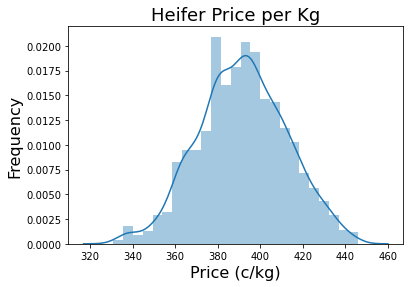

In [72]:
#checking distribution of the Heifers Price
sns.distplot(df.loc[:,"Heifers O3 (Ire)":"Heifers U3 (Ire)"])
plt.title('Heifer Price per Kg', fontsize=18)
plt.xlabel('Price (c/kg)', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

plt.show()

/Users/Noel/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



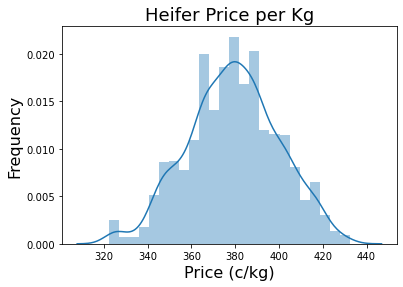

In [73]:
#checking distribution of the Heifers Price
sns.distplot(df.loc[:,"Steers O3 (Ire)":"Steers U3 (Ire)"])
plt.title('Heifer Price per Kg', fontsize=18)
plt.xlabel('Price (c/kg)', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

plt.show()

/Users/Noel/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



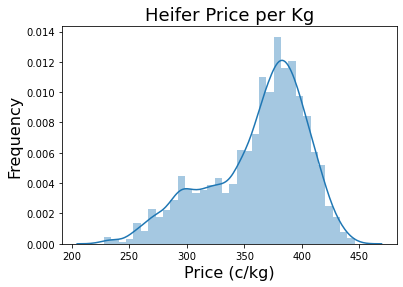

In [74]:
#checking distribution of the Heifers Price
sns.distplot(df.loc[:,"Cows O3 (Ire)":"Steers U3 (Ire)"])
plt.title('Heifer Price per Kg', fontsize=18)
plt.xlabel('Price (c/kg)', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

plt.show()

/Users/Noel/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



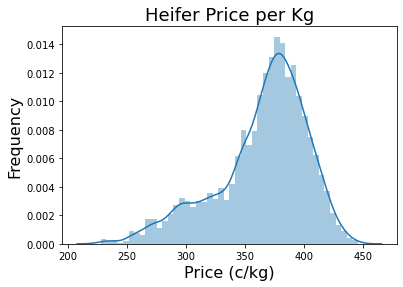

In [75]:
#checking distribution of the Heifers Price
sns.distplot(df.loc[:,"Cows O3 (Ire)":"Young Bulls U3 (Ire)"])
plt.title('Heifer Price per Kg', fontsize=18)
plt.xlabel('Price (c/kg)', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

plt.show()

<Figure size 432x288 with 0 Axes>

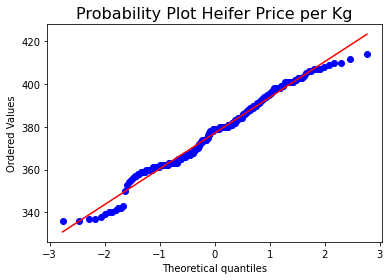

<Figure size 432x288 with 0 Axes>

In [76]:
#Normality plot. Our variable is "Heifers O3 Ire"
x = df["Heifers O3 (Ire)"].astype(int)

stats.probplot(x , plot=plt)
plt.title('Probability Plot Heifer Price per Kg', fontsize=16)
plt.figure()

<Figure size 432x288 with 0 Axes>

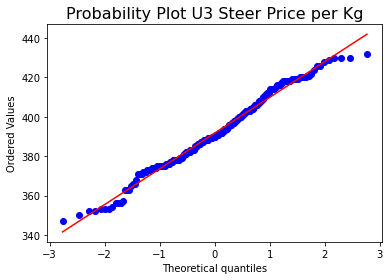

<Figure size 432x288 with 0 Axes>

In [77]:
#Normality plot. Our variable is "Heifers O3 Ire"
x = df["Steers U3 (Ire)"].astype(int)

stats.probplot(x , plot=plt)
plt.title('Probability Plot U3 Steer Price per Kg', fontsize=16)
plt.figure()

In [78]:
stats.shapiro(x)

ShapiroResult(statistic=0.9862581491470337, pvalue=0.019948367029428482)

In [79]:
#using shapiro test to check for normaility
x = df.loc[:,"Steers O3 (Ire)":"Steers U3 (Ire)"].astype(int)

stats.shapiro(x)


ShapiroResult(statistic=0.9959467053413391, pvalue=0.0006560930632986128)

In [80]:
#using shapiro test to check for normaility
x = df.loc[:,"Cows O3 (Ire)":"Steers U3 (Ire)"].astype(int)

stats.shapiro(x)



ShapiroResult(statistic=0.9475722312927246, pvalue=1.8451207968023946e-38)

In [81]:
#using shapiro test to check for normaility
stats.shapiro(df["Heifers O3 (GB)"].astype(int))

ShapiroResult(statistic=0.9120535254478455, pvalue=9.654209376375178e-11)

In [82]:
#using shapiro test to check for normaility
stats.shapiro(df_2019["Steers R3 (GB)"].astype(int))

ShapiroResult(statistic=0.8755805492401123, pvalue=0.0004009052354376763)

In [83]:
#This means the avona test will not work as data is not normally distribute. I will try t-test & ANOVA anyway

In [86]:
#Calculating
x = df["Cows R3 (Ire)"]
mean_cows_r3_Ire= x.mean()

sd = x.std()
print('Mean:',mean_cows_r3_Ire, 'Std Dev:', sd)

Mean: 331.4880578512395 Std Dev: 23.447887799767773


In [87]:

#H0 : u = 320
#H1 : u =! 320

stats.ttest_1samp(x,320)

Ttest_1sampResult(statistic=7.6216775229458245, pvalue=5.729779708268559e-13)

In [88]:
#because p>0.05 we would accept H1. There is not enough evidence to say that mean is = 320 c/kg
df["Cows R3 (Ire)"]

0      279.6
1      288.9
2      296.1
3      298.4
4      302.0
       ...  
245    342.7
246    337.5
247    337.4
248    334.7
249    333.7
Name: Cows R3 (Ire), Length: 242, dtype: object

In [89]:
#Suppose that a farmer wants to know if the price is, in average, greater than 320 c/kg. 
#Calculate the test at a 5% significance level.

#H1 : u > 320
stats.t.sf(7.333582654706759, 249) 

#If p value < alpha --> we reject H0
#If p-valye > alpha --> we accept H0


1.5710022883060992e-12

In [90]:
#We perform the test assuming as H0 that mu1 = mu2 (Ire = NI)

a = df["Steers R3 (Ire)"]
b = df["Heifers R3 (Ire)"]

test = stats.ttest_ind(a, b, 
                      equal_var=True)

display(test)

Ttest_indResult(statistic=-7.769161342819729, pvalue=4.7985043555031623e-14)

In [91]:
#pvalue < alpha so reject null hypothesis ie averages not the same

In [92]:
#We perform the test assuming as H0 that mu1 = mu2 (Ire = NI)

a = df["Heifers R3 (Ire)"]
b = df["Heifers R3 (GB)"]

test = stats.ttest_ind(a, b, 
                      equal_var=True)

display(test)

Ttest_indResult(statistic=-13.863646029335934, pvalue=5.08895498855498e-37)

In [93]:
test = stats.ttest_ind(a, b, 
                      equal_var=False)

display(test)

Ttest_indResult(statistic=-13.863646029335934, pvalue=2.153873390199546e-35)

In [94]:
x = df_2019["Heifers R3 (Ire)"]
y = df_2019["Heifers R3 (GB)"]
z = df_2019["Heifers R3 (NI)"]

In [95]:
#perform Kruskal-Wallis Test 
stats.kruskal(x, y, z)

KruskalResult(statistic=15.065800362554091, pvalue=0.0005351838735287057)

In [96]:
#perform Kruskal-Wallis Test 

x = df_2016["Heifers R3 (Ire)"]
y = df_2017["Heifers R3 (Ire)"]
z = df_2018["Heifers R3 (Ire)"]

stats.kruskal(x, y, z)

KruskalResult(statistic=2.4613918519594904, pvalue=0.2920892344464912)

In [97]:
#perform Kruskal-Wallis Test 

x = df_2016["Heifers R3 (GB)"]
y = df_2017["Heifers R3 (GB)"]
z = df_2018["Heifers R3 (GB)"]

stats.kruskal(x, y, z)

KruskalResult(statistic=0.6198094962478063, pvalue=0.7335168217502455)

In [98]:
#perform Kruskal-Wallis Test 

x = df_2019["Heifers R3 (GB)"]
y = df_2017["Heifers R3 (GB)"]
z = df_2018["Heifers R3 (GB)"]

stats.kruskal(x, y, z)

KruskalResult(statistic=73.73704696975553, pvalue=9.732035727208256e-17)

In [99]:
#perform Kruskal-Wallis Test 

x = df["Heifers R3 (Ire)"]
y = df["Heifers R3 (GB)"]
z = df["Heifers R3 (NI)"]

stats.kruskal(x, y, z)

KruskalResult(statistic=172.602329312427, pvalue=3.3103995019539925e-38)

In [100]:
from scipy.stats import mannwhitneyu

# Carrying out the Wilcoxon–Mann–Whitney test
results = mannwhitneyu(df_2018["Heifers R3 (GB)"], df_2017["Heifers R3 (GB)"])
results

MannwhitneyuResult(statistic=1066.0, pvalue=0.22080339260533544)

In [101]:
from scipy.stats import mannwhitneyu

# Carrying out the Wilcoxon–Mann–Whitney test
results = mannwhitneyu(df_2018["Heifers R3 (GB)"], df_2019["Heifers R3 (GB)"])
results

MannwhitneyuResult(statistic=108.0, pvalue=1.5566675575175525e-13)

In [102]:
from scipy.stats import mannwhitneyu

# Carrying out the Wilcoxon–Mann–Whitney test
results = mannwhitneyu(df_2018["Heifers U3 (Ire)"], df_2018["Steers U3 (Ire)"])
results

MannwhitneyuResult(statistic=688.0, pvalue=2.1006412213158523e-05)

In [103]:
from scipy.stats import mannwhitneyu

# Carrying out the Wilcoxon–Mann–Whitney test
results = mannwhitneyu(df_2018["Heifers O3 (Ire)"], df_2018["Steers O3 (Ire)"])
results

MannwhitneyuResult(statistic=770.0, pvalue=0.00019464104257031775)

In [104]:
from scipy.stats import mannwhitneyu

# Carrying out the Wilcoxon–Mann–Whitney test
#checking differenece in price between heifers and steers
results = mannwhitneyu(df["Heifers O3 (Ire)"], df["Steers O3 (Ire)"])
results

MannwhitneyuResult(statistic=17477.0, pvalue=8.413273379304685e-15)

In [105]:
from scipy.stats import mannwhitneyu

# Carrying out the Wilcoxon–Mann–Whitney test
#checking differenece in price between heifers and steers
results = mannwhitneyu(df["Heifers O3 (GB)"], df["Steers O3 (GB)"])
results

MannwhitneyuResult(statistic=26432.0, pvalue=0.03200277413168375)

In [106]:
from scipy.stats import mannwhitneyu

# Carrying out the Wilcoxon–Mann–Whitney test
#checking differenece in price between heifers and steers
results = mannwhitneyu(df["Heifers O3 (GB)"], df["Heifers O3 (Ire)"])
results

MannwhitneyuResult(statistic=15500.5, pvalue=1.660683650282447e-19)

In [107]:
from scipy.stats import mannwhitneyu

# Carrying out the Wilcoxon–Mann–Whitney test
#checking differenece in price between heifers and steers
results = mannwhitneyu(df_2018["Heifers O3 (GB)"], df_2018["Steers O3 (GB)"])
results

MannwhitneyuResult(statistic=1082.0, pvalue=0.07225446861417935)

In [108]:
from scipy.stats import mannwhitneyu

# Carrying out the Wilcoxon–Mann–Whitney test
#checking differenece in price between heifers and steers
results = mannwhitneyu(df_2018["Heifers O3 (GB)"], df_2018["Heifers O3 (Ire)"])
results

MannwhitneyuResult(statistic=611.0, pvalue=1.997643332389369e-06)

In [109]:
from scipy.stats import mannwhitneyu

# Carrying out the Wilcoxon–Mann–Whitney test
#checking differenece in price between heifers and steers
results = mannwhitneyu(df_2018["Heifers O3 (GB)"], df_2018["Heifers U3 (Ire)"])
results

MannwhitneyuResult(statistic=478.0, pvalue=1.878565909659505e-08)

In [110]:
from scipy.stats import mannwhitneyu

# Carrying out the Wilcoxon–Mann–Whitney test
#checking differenece in price between heifers and steers
results = mannwhitneyu(df["Heifers O3 (GB)"], df["Heifers U3 (Ire)"])
results

MannwhitneyuResult(statistic=20635.5, pvalue=9.559006041626382e-09)

In [111]:
from scipy.stats import mannwhitneyu

# Carrying out the Wilcoxon–Mann–Whitney test
#checking differenece in price between heifers and steers
results = mannwhitneyu(df["Heifers O4 (GB)"], df["Heifers O3 (NI)"])
results

MannwhitneyuResult(statistic=23647.5, pvalue=0.0001251107630845514)